In [402]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

## 1 - Multiple Regression

#### 1.1 - Loading datasets and getting a perspective on them

In [403]:
elections = pd.read_csv('./Downloads/us-elections-2016.csv.bz2', sep='\t')
county = pd.read_csv('./Downloads/county-data.csv.bz2', sep=',')

In [404]:
elections.head(7)

,fips_code,county,total_2008,dem_2008,gop_2008,oth_2008,total_2012,dem_2012,gop_2012,oth_2012,total_2016,dem_2016,gop_2016,oth_2016,stateFips,state
0,26041,Delta County,19064,9974,8763,327,18043,8330,9533,180,18467,6431,11112,924,26,Michigan
1,48295,Lipscomb County,1256,155,1093,8,1168,119,1044,5,1322,135,1159,28,48,Texas
2,1127,Walker County,28652,7420,20722,510,28497,6551,21633,313,29243,4486,24208,549,1,Alabama
3,48389,Reeves County,3077,1606,1445,26,2867,1649,1185,33,3184,1659,1417,108,48,Texas
4,56017,Hot Springs County,2546,619,1834,93,2495,523,1894,78,2535,400,1939,196,56,Wyoming
5,20043,Doniphan County,3564,1115,2372,77,3369,885,2397,87,3366,584,2601,181,20,Kansas
6,37183,Wake County,442245,250891,187001,4353,526805,286939,232933,6933,510940,298353,193607,18980,37,North Carolina


In [405]:
elections.shape

(3112, 16)

In [406]:
elections.isna().sum()

fips_code     0
county        0
total_2008    0
dem_2008      0
gop_2008      0
oth_2008      0
total_2012    0
dem_2012      0
gop_2012      0
oth_2012      0
total_2016    0
dem_2016      0
gop_2016      0
oth_2016      0
stateFips     0
state         0
dtype: int64

In [407]:
elections.fips_code.nunique()

3112

In [408]:
county.head(7)

,SUMLEV,REGION,DIVISION,STATE,COUNTY,STNAME,CTYNAME,CENSUS2010POP,ESTIMATESBASE2010,POPESTIMATE2010,...,RDOMESTICMIG2013,RDOMESTICMIG2014,RDOMESTICMIG2015,RDOMESTICMIG2016,RNETMIG2011,RNETMIG2012,RNETMIG2013,RNETMIG2014,RNETMIG2015,RNETMIG2016
0,40,3,6,1,0,Alabama,Alabama,4779736,4780131,4785492,...,0.335703,0.086842,-0.642255,-0.177829,0.709411,1.062617,1.202226,1.065267,0.411670,0.797351
1,50,3,6,1,1,Alabama,Autauga County,54571,54571,54742,...,-4.607582,2.149969,-2.799695,4.128528,6.163804,-5.295515,-4.571158,2.259290,-2.654256,4.255281
2,50,3,6,1,3,Alabama,Baldwin County,182265,182265,183199,...,21.672935,19.038117,17.311339,19.628723,15.757654,18.612620,22.757100,20.248574,18.585398,20.807611
3,50,3,6,1,5,Alabama,Barbour County,27457,27457,27348,...,-7.027927,-4.208488,-16.593442,-9.495549,-1.280316,-7.418561,-7.360829,-4.506434,-16.819716,-9.686991
4,50,3,6,1,7,Alabama,Bibb County,22915,22919,22861,...,-6.556506,0.088865,0.088747,1.504292,-4.956466,-4.318988,-5.980596,0.888652,0.887469,2.300681
5,50,3,6,1,9,Alabama,Blount County,57322,57324,57376,...,-1.627452,-2.791093,-1.405067,-1.126712,1.755255,-0.848639,-1.125366,-2.236341,-0.780593,-0.468019
6,50,3,6,1,11,Alabama,Bullock County,10914,10911,10892,...,-8.666981,10.992108,-26.456276,-9.703608,-20.634774,-6.923653,-7.819124,11.931605,-25.605896,-8.838930


In [409]:
county.shape

(3193, 116)

In [410]:
# Too many columns, so let's check the total sum of null values in ALL of them
county.isna().sum().sum()

0

#### 1.2 - Merge the datasets

As recommended in the assignment, we can create a new column in the `county` dataframe, called `fips_code`, which is constructed by joining the value from the `STATE` variable to the `COUNTY` one.

In [411]:
print(f'Data types: \n STATE:  {county.STATE.dtype}\n COUNTY: {county.COUNTY.dtype}')

Data types: 
 STATE:  int64
 COUNTY: int64


This is the tricky part. Counties that have **less than** 3 county fips will have the number 0 added to their start.

Check the example below for Autauga County, in the state of Alabama:

In [412]:
county[(county.STATE == 1) & (county.COUNTY == 1)]

,SUMLEV,REGION,DIVISION,STATE,COUNTY,STNAME,CTYNAME,CENSUS2010POP,ESTIMATESBASE2010,POPESTIMATE2010,...,RDOMESTICMIG2013,RDOMESTICMIG2014,RDOMESTICMIG2015,RDOMESTICMIG2016,RNETMIG2011,RNETMIG2012,RNETMIG2013,RNETMIG2014,RNETMIG2015,RNETMIG2016
1,50,3,6,1,1,Alabama,Autauga County,54571,54571,54742,...,-4.607582,2.149969,-2.799695,4.128528,6.163804,-5.295515,-4.571158,2.25929,-2.654256,4.255281


In [413]:
elections[elections.county == 'Autauga County'][['fips_code', 'county']]

,fips_code,county
2979,1001,Autauga County


As we can see, the state code for Alabama is 1, and the county code for Autauga County is also 1. **However**, its fips code is not 11, but 1001, because the county fips code must have 3 digits.

We must take this fundamental detail into consideration for creating the 5-digit fips code!

In [414]:
# Based on https://stackoverflow.com/questions/26886653/pandas-create-new-column-based-on-values-from-other-columns-apply-a-function-o
def fips_code_maker(row):
    if row['COUNTY'] < 10:
        return '00' + str(row['COUNTY'])
    elif row['COUNTY'] < 100:
        return '0' + str(row['COUNTY'])
    else:
        return str(row['COUNTY'])

In [415]:
#county.apply(lambda row: fips_code_maker(row), axis=1)
county['FIPS_CODE'] = county['STATE'].apply(str) + county.apply(lambda row: fips_code_maker(row), axis=1)

In [416]:
county.sample(5)

,SUMLEV,REGION,DIVISION,STATE,COUNTY,STNAME,CTYNAME,CENSUS2010POP,ESTIMATESBASE2010,POPESTIMATE2010,...,RDOMESTICMIG2014,RDOMESTICMIG2015,RDOMESTICMIG2016,RNETMIG2011,RNETMIG2012,RNETMIG2013,RNETMIG2014,RNETMIG2015,RNETMIG2016,FIPS_CODE
3138,50,2,3,55,81,Wisconsin,Monroe County,44673,44675,44776,...,-2.738214,-2.002927,-2.742973,3.091671,-5.916439,0.177117,-2.164072,-1.122520,-2.260209,55081
1378,50,2,4,27,81,Minnesota,Lincoln County,5896,5896,5885,...,1.033770,-5.530591,2.597403,-3.236246,-8.060367,-2.067540,1.033770,-5.530591,2.597403,27081
2354,50,1,1,44,7,Rhode Island,Providence County,626667,626672,627199,...,-5.006363,-6.783485,-5.943952,-1.035621,-1.038609,-2.209524,0.718366,-0.871869,-0.116889,44007
2700,50,3,7,48,267,Texas,Kimble County,4607,4605,4587,...,-4.716451,-10.641911,8.846546,8.710801,-9.192383,-11.768624,-4.716451,-10.641911,8.846546,48267
1233,50,3,5,24,41,Maryland,Talbot County,37782,37782,37884,...,-6.809480,0.346242,-4.010642,3.585694,4.998159,0.500204,-5.802631,1.358334,-2.994612,24041


In [417]:
county.FIPS_CODE.nunique()

3193

In [418]:
county.FIPS_CODE.dtype

dtype('O')

In [419]:
elections.fips_code.dtype

dtype('int64')

In [420]:
# Convert `fips_code` to int64, just like the corresponding variable from the `elections` dataset
county.FIPS_CODE = pd.to_numeric(county.FIPS_CODE)

In [421]:
print(f'Data types: \n STATE: {county.STATE.dtype}\n COUNTY: {county.COUNTY.dtype}\n FIPS_CODE: {county.FIPS_CODE.dtype}')

Data types: 
 STATE: int64
 COUNTY: int64
 FIPS_CODE: int64


In [422]:
merged = elections.merge(county, left_on='fips_code', right_on='FIPS_CODE')
# Drop the redudant variable
merged.drop('FIPS_CODE', inplace=True, axis=1)
merged.head(7)

,fips_code,county,total_2008,dem_2008,gop_2008,oth_2008,total_2012,dem_2012,gop_2012,oth_2012,...,RDOMESTICMIG2013,RDOMESTICMIG2014,RDOMESTICMIG2015,RDOMESTICMIG2016,RNETMIG2011,RNETMIG2012,RNETMIG2013,RNETMIG2014,RNETMIG2015,RNETMIG2016
0,26041,Delta County,19064,9974,8763,327,18043,8330,9533,180,...,-0.434381,-5.939812,-2.822691,-3.966450,-0.972960,-0.867526,-0.271488,-5.776331,-2.658263,-3.801182
1,48295,Lipscomb County,1256,155,1093,8,1168,119,1044,5,...,6.915430,13.070038,-9.566685,-29.545455,7.240911,31.167304,7.779859,14.490695,-7.878447,-27.840909
2,1127,Walker County,28652,7420,20722,510,28497,6551,21633,313,...,-0.908093,-3.391687,-3.133239,-2.763746,-3.920190,-3.778072,-0.484316,-2.874568,-2.598296,-2.226351
3,48389,Reeves County,3077,1606,1445,26,2867,1649,1185,33,...,7.486364,10.436001,12.868780,-3.231235,-8.770658,6.281135,11.407793,14.988618,17.523444,1.548300
4,56017,Hot Springs County,2546,619,1834,93,2495,523,1894,78,...,2.065476,-4.358203,-6.497590,-9.974533,5.398671,5.588905,2.065476,-4.358203,-6.497590,-9.974533
5,20043,Doniphan County,3564,1115,2372,77,3369,885,2397,87,...,-4.200344,-1.530905,-8.724100,-11.932555,-2.264293,-10.366625,-3.563928,-0.637877,-7.826031,-11.024643
6,37183,Wake County,442245,250891,187001,4353,526805,286939,232933,6933,...,10.767224,12.060957,11.716590,12.607522,15.214385,16.179610,14.338994,15.989313,15.739619,16.462962


#### 1.3 - Consistency check

In [423]:
merged.shape

(3111, 132)

We have 3111 rows, which is valid as the `elections` dataset had 3112 unique fips codes (and rows), so maybe one of the counties were not in the `county` dataset, which contained 3193 counties.

When checking the number of states, we find that the `merged` dataset only has data on 50 of them, not 51 (50 plus the District of Columbia).

In [424]:
merged.STNAME.nunique()

50

In [425]:
county.STNAME.nunique()

51

In [426]:
elections.state.nunique()

50

However, we see that this is because the `elections` dataset did not contain information on one of the states.

In [427]:
# Let's figure out which state is not in the `elections` dataframe
np.isin(county.STNAME.unique(), elections.state.unique())

array([ True, False,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True])

In [428]:
# The function above gave us that the second state in the list below is the one missing, which is ALASKA!
county.STNAME.unique()

array(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California',
       'Colorado', 'Connecticut', 'Delaware', 'District of Columbia',
       'Florida', 'Georgia', 'Hawaii', 'Idaho', 'Illinois', 'Indiana',
       'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 'Maine', 'Maryland',
       'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi',
       'Missouri', 'Montana', 'Nebraska', 'Nevada', 'New Hampshire',
       'New Jersey', 'New Mexico', 'New York', 'North Carolina',
       'North Dakota', 'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania',
       'Rhode Island', 'South Carolina', 'South Dakota', 'Tennessee',
       'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington',
       'West Virginia', 'Wisconsin', 'Wyoming'], dtype=object)

In [429]:
elections[elections.state == 'Alaska']

,fips_code,county,total_2008,dem_2008,gop_2008,oth_2008,total_2012,dem_2012,gop_2012,oth_2012,total_2016,dem_2016,gop_2016,oth_2016,stateFips,state


Therefore, we have 50 states, one of them being the District of Columbia. However, we do not have data on elections in the state of Alaska due to the nature of the data in the `elections` dataset. Therefore, all of the analysis we will make do not include data on this particularly cold state.

### Analysis on the relationship between _percentage of votes cast for democrats_ and various state-related _demographic characteristics_

#### 1.4 - Percentage of votes for democrats in 2016

In [430]:
merged['dem_pct'] = round((merged.dem_2016 / merged.total_2016) * 100, 2)

In [431]:
# Min percentage
merged.loc[merged['dem_pct'] == merged['dem_pct'].min()][['county', 'state', 'dem_pct']]

,county,state,dem_pct
690,King County,Texas,3.14


In [432]:
# Max percentage
merged.loc[merged['dem_pct'] == merged['dem_pct'].max()][['county', 'state', 'dem_pct']]

,county,state,dem_pct
2546,District of Columbia,District of Columbia,92.85


In [433]:
# Average percentage
round(merged['dem_pct'].mean(), 2)

31.69

In [434]:
# Checking on null values
merged['dem_pct'].isna().sum()

0

We are checking on minimum and maximum to see how different and polarized the United States can be. In one county the Democrats had a massive win by having 92.85% of the votes in the 2016 elections, but they also suffered a gigantic loss in another county, with only 3.14% of the votes (interesting number, PI day was yesterday!).

Of course that, due to the way the national elections are hold, some U.S. states are "more important" in terms of win/loss than others, depending on how many representatives they have due to the differences in their populations sizes.

#### 1.5 - Visualization!

Text(0.5, 1.0, 'Histogram of estimated population of U.S. counties in 2016')

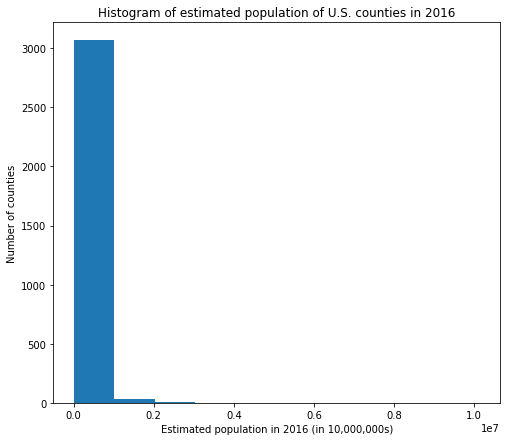

In [435]:
# Analyzing the POPESTIMATE2016 variable

# Source: https://medium.com/towards-artificial-intelligence/when-and-why-to-use-log-transformation-in-regression-6a326d6259e6
plt.figure(figsize=(8, 7))
plt.hist(merged.POPESTIMATE2016)
plt.xlabel('Estimated population in 2016 (in 10,000,000s)')
plt.ylabel('Number of counties')
plt.title('Histogram of estimated population of U.S. counties in 2016')

Most counties had an estimated population of under 1 million people, with just a few above that. Because there is a huge difference between a county with just a couple thousand people, and a county with almost a million, applying **natural log** to this variable is a good idea for further analysis.

The greater the population is, the greater its natural log will be. However, we know that log(x) increases on a smaller rate as x increases (for positive numbers). This relationship can give us a better insight on our visualization, as seen below:

Text(0, 0.5, 'Votes cast for democrats (%)')

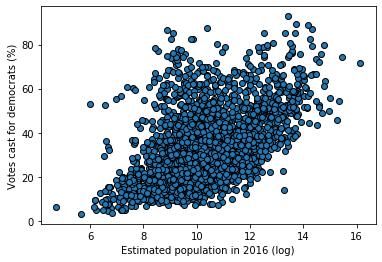

In [436]:
# Scatterplot
plt.scatter(np.log(merged.POPESTIMATE2016), merged.dem_pct, edgecolor='k')

plt.xlabel('Estimated population in 2016 (log)')
plt.ylabel('Votes cast for democrats (%)')

We can see that there is a positive correlation between the natural log of the estimated population for a county in 2016 and the percentage of votes cast for the Democratic party in the elections that year.

Observe that most of the points in our scatterplot are very condensed on the range of about 10% and 20% for a log between 6 and 10. However, the range goes to about 30% and 60% more consistently for a log between 10 and 13, which may indicate that larger populations tend to have a higher percentage of votes cast for democrats than smaller ones.

It is true though, that this variable alone does not explain the variations and differences in the percentage of votes for democrats in 2016.

#### 1.6 - DIVISION (and REGION) variables

Text(0.5, 1.0, 'Histogram of the number of counties in each U.S. Division')

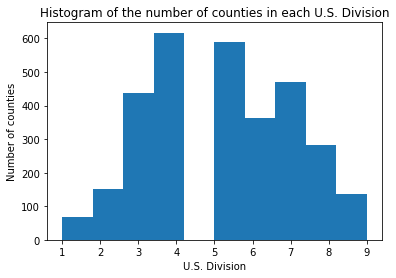

In [437]:
plt.hist(merged.DIVISION)
plt.xlabel('U.S. Division')
plt.ylabel('Number of counties')
plt.title('Histogram of the number of counties in each U.S. Division')

# Key for DIVISION (from the 'county-data-variables.pdf file on Canvas'):
 # 1 = New England; 2 = Middle Atlantic; 3 = East North Central; 4 = West North Central;
 # 5 = South Atlantic; 6 = East South Central; 7 = West South Central; 8 = Mountain; 9 = Pacific

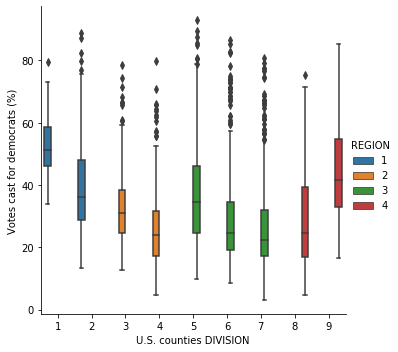

In [438]:
# Boxplot with seaborn! We're working with a categorical data, after all
import seaborn as sns
g = sns.catplot(x='DIVISION', y='dem_pct', hue='REGION', kind='box', data=merged)
g.set_axis_labels('U.S. counties DIVISION', 'Votes cast for democrats (%)')

# Key for REGION (from the 'county-data-variables.pdf file on Canvas'):
 # 1 = Northeast 2 = Midwest 3 = South  4 = West 

I chose to use both DIVISION and REGION variables to confirm some assumptions I had. As we know, there is a tendency in the United States that states in the Northern part (plus California) are usually supportive of the Democrat party, whereas the Southern ones are in favor of the Republican party.

From the plot above, we can see that the counties on New England and in the Pacific are the ones who had the highest percentage of votes cast for Democrats, with their median about 52% and 42%, respectively. The minimums and maximums are also interesting to observe as, in the case of the Pacific division, for example, they can go down to 20% of votes and up to 85%, which shows that counties in a certain division and region not necessarily share the same views and ideals than their "mates".

On the other hand, counties in the Midwest and the South - specially in the West North Central, East South Central, and West South Central divisions - showed a lower percentage of votes cast for democrats, with medians below 40% and above 20%. However, these divisions have the largest amount of outliers, which represent counties that had a very high percentage of votes cast for democrats in the 2016 elections. This can indicate that, despite being part of divisions and regions that are majority pro-Republican, a few counties lean more towards democratic ideals.

### Regression analysis

#### 1.7 - Regression model of democrat's percentage by county population

In [439]:
import statsmodels.formula.api as smf
m = smf.ols(formula='dem_pct ~POPESTIMATE2016', data=merged).fit()
m.params

Intercept          30.018676
POPESTIMATE2016     0.000016
dtype: float64

In [440]:
m.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                dem_pct   R-squared:                       0.122
Model:                            OLS   Adj. R-squared:                  0.122
Method:                 Least Squares   F-statistic:                     433.4
Date:                Mon, 16 Mar 2020   Prob (F-statistic):           3.15e-90
Time:                        16:02:11   Log-Likelihood:                -12703.
No. Observations:                3111   AIC:                         2.541e+04
Df Residuals:                    3109   BIC:                         2.542e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          30.0187      0.270    111.270      0.000      29.490      30.548
POPESTIMATE2016  1.616e-05   7.76e-07     20.819      0.000    1.46e-05    1.77e-05
==============================================================================
Omnibus:                      386.660   Durbin-Watson:                   2.003
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1018.447
Skew:                           0.689   Prob(JB):                    7.03e-222
Kurtosis:                       5.441   Cond. No.                     3.64e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.64e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Using the county population in 2016 as the response variable and the democrat's percentage of each county as the independent variable, we have a slope of 0.000016 and an intercept of 30. That means that, when the population is 0, the percentage of votes cast for the Democrats is of 30% and, for each increase of 1 person in this population, the percentage **goes up** by 0.000016%.

From the summary table we can also see that, for both coefficients, we have very big t-values and we have p-values equal to 0. Because of our 5% significance level, a p-value < 0.05 means that we reject the null hypothesis that these values were random. As this happens for both coefficients, they are **both statistically significant**. Note, as well, how the two coefficients are within the [0.025, 0.975] interval as well!

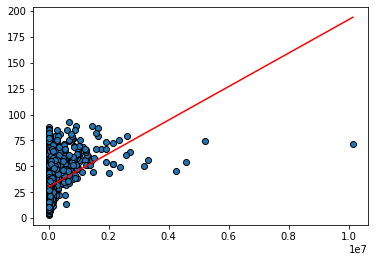

In [441]:
x = np.linspace(merged.POPESTIMATE2016.min(), merged.POPESTIMATE2016.max(), 10)
y_hat = m.params[0] + m.params[1]*x
plt.scatter(merged.POPESTIMATE2016, merged.dem_pct, edgecolor='k')
plt.plot(x, y_hat, c='red')

#### 1.8 - Regression model of democrat's percentage by natural log of county population

In [442]:
m = smf.ols(formula='dem_pct ~ np.log(POPESTIMATE2016)', data=merged).fit()

In [443]:
# Summary table
m.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                dem_pct   R-squared:                       0.251
Model:                            OLS   Adj. R-squared:                  0.250
Method:                 Least Squares   F-statistic:                     1040.
Date:                Mon, 16 Mar 2020   Prob (F-statistic):          4.59e-197
Time:                        16:02:11   Log-Likelihood:                -12457.
No. Observations:                3111   AIC:                         2.492e+04
Df Residuals:                    3109   BIC:                         2.493e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                 -21.6520      1.671    -12.955      0.000     -24.929     -18.375
np.log(POPESTIMATE2016)     5.1860      0.161     32.247      0.000       4.871       5.501
==============================================================================
Omnibus:                      621.978   Durbin-Watson:                   1.992
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1196.497
Skew:                           1.209   Prob(JB):                    1.53e-260
Kurtosis:                       4.839   Cond. No.                         73.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Using the natural log of the county population in 2016 as the response variable and the democrat's percentage of each county as the independent variable, we have a slope of about 5.19 and an intercept of -21.65. That means that, when the population is 0, the percentage of votes cast for the Democrats is of -21.65% and, for each increase of 1 in the natural log of this population, the percentage **goes up** by 5.19%.

From the summary table we can also see that, for both coefficients, we have very big t-values and we have p-values equal to 0. Because of our 5% significance level, a p-value < 0.05 means that we reject the null hypothesis that these values were random. As this happens for both coefficients, they are **both statistically significant**. Note, as well, how the two coefficients are within the [0.025, 0.975] interval as well!

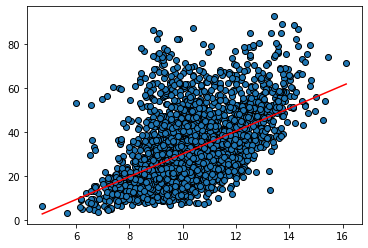

In [444]:
# Let's revisit our plot, but this time with the linear regression line crossing it
x = np.linspace(np.log(merged.POPESTIMATE2016).min(), np.log(merged.POPESTIMATE2016).max(), 10)
y_hat = m.params[0] + m.params[1]*x
plt.scatter(np.log(merged.POPESTIMATE2016), merged.dem_pct, edgecolor='k')
plt.plot(x, y_hat, c='red')

#### 1.9 - Comparing the models

I prefer the second model, with the natural log transformation, than the first one. Both models display a positive correlation between the percentage of votes cast for democrats and the two independent variables used in the models. 

However, the fact that the second model uses the natural log transformation - which I believed back at step 1.5 to be more useful - brings a greater R^2 value, which indicates that it explains more of the variability in the response variable than the first model. Because the natural log makes the data more sparse (less concentrated) due to its naturality (being the population of a county), I believe that it is better for the regression model.

#### 1.10 - Multiple Regression model

Besides the natural log of the county population in 2016, let's add a few more variables to the model, making it a **multiple regression model**.

We'll use the following variables:
- The natural log of the estimated county population in 2016;
- Census Division Code
- Census Region Code
- Death rate in period 7/1/2015 to 6/30/2016
- Net migration rate in period 7/1/2015 to 6/30/2016

In [445]:
merged['logPOPESTIMATE2016'] = np.log(merged['POPESTIMATE2016'])

In [446]:
# Source: https://towardsdatascience.com/simple-and-multiple-linear-regression-with-python-c9ab422ec29c
from sklearn.linear_model import LinearRegression

# Create linear regression object.
mlr = LinearRegression()

# Fit linear regression.
mlr.fit(merged[['logPOPESTIMATE2016', 'DIVISION', 'REGION', 'RDEATH2016', 'RNETMIG2016']], merged['dem_pct'])

# Get the slope and intercept of the line best fit.
mlr.coef_

array([ 5.20132659, -2.64532676,  6.40100586, -0.48514801, -0.1396564 ])

From the results above, we can observe that there is a **positive correlation** between the percentage of votes cast for democrats in 2016 and the following variables: _natural log of the estimated county population in 2016_, and _region_. On the other hand, there is a **negative correlation** between the response variable and the following ones: _DIVISION_, _RDEATH2016_, and _RNETMIG2016_, with the last two having small negative coefficients.

In our multiple regression model, we have that, with **all other variables constant**, an increase of 1 in the following variable:
- `logPOPESTIMATE2016` increases the percentage rate by 5.20%.
- `DIVISION` decreases the percentage rate by 2.65%.
- `REGION` increases the percentage rate by 6.40%.
- `RDEATH2016` decreases the percentage rate by 0.49%.
- `RNETMIG2016` decreases the percentage rate by 0.14%.

#### 1.11 - Insights!

One of the issues with the data, that we managed to observe at the beginning of this first part of the assignment, was that we lack data on elections in Alaska. This probably did not affect our models and analyzes entirely, but it did not give us the best scenario nor insights.

In general, everything we managed to get out from the datasets could be used by both the Democrats, which have an idea on the factors that could effectively affect the number of votes they receive and where they are mostly located at, but also by the Republicans, as they can create strategies to transfer some of their investments from places they are well represented to others that they can perform better in the future.

In the end, everyone wins as we have free access to such fantastic, socially-responsible datasets. I am glad we had the opportunity to work with such important, real data and got a glimpse of the impact we can create in the world with it!

## 2 - Categorization

#### 2.1 - Loading data and performing basic sanity checks

In [447]:
listings = pd.read_csv("./Downloads/airbnb-beijing-listings.csv.bz2")
listings.head(4)

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,44054,https://www.airbnb.com/rooms/44054,20191124233310,2019-11-25,Modern and Comfortable Living in CBD,East Apartments offers comfortable living away...,East Apartments is a western managed serviced ...,East Apartments offers comfortable living away...,none,The neighborhood is a private compound. Just ...,...,t,f,strict_14_with_grace_period,f,f,5,5,0,0,0.86
1,100213,https://www.airbnb.com/rooms/100213,20191124233310,2019-11-25,The Great Wall Box Deluxe Suite A团园长城小院东院套房,This is your guide to live by the Great Wall! ...,This is your guide to live by the Great Wall! ...,This is your guide to live by the Great Wall! ...,none,"5 mins walk to Panglongshan Great Wall, 25 min...",...,t,f,strict_14_with_grace_period,f,f,4,0,3,1,0.07
2,103749,https://www.airbnb.com/rooms/103749,20191124233310,2019-11-25,Sun Thirsty Full Service Suite Apt.,"华纳北京恋日公寓位于北京的中心商务区,是十分受到旅客欢迎的订房选择｡ 5.0 km之外便是市...",Our Suite Apartments are located only 40 km fr...,Our Suite Apartments are located only 40 km fr...,none,Numerous eateries and coffee store within 3 mi...,...,f,f,moderate,f,f,3,3,0,0,0.16
3,114384,https://www.airbnb.com/rooms/114384,20191124233310,2019-11-25,CBD Luxury 1-bedroom suite with a 30m2 terrace,Located in the core position of Chaoyang CBD. ...,Closed fully-equipped kitchen with top brand f...,Located in the core position of Chaoyang CBD. ...,none,Located in the core position of Chaoyang CBD. ...,...,t,f,moderate,f,f,3,3,0,0,0.77


In [448]:
# Many columns, many more rows
listings.shape

(38814, 106)

In [449]:
# Some variables only have null values lol
listings.isna().sum().sort_values(ascending=False)

host_acceptance_rate            38814
xl_picture_url                  38814
thumbnail_url                   38814
neighbourhood_group_cleansed    38814
medium_url                      38814
                                ...  
maximum_nights                      0
minimum_minimum_nights              0
maximum_minimum_nights              0
minimum_maximum_nights              0
id                                  0
Length: 106, dtype: int64

In [450]:
# Number of columns with null values (from a total of 106)
len(listings.columns[listings.isna().any()].tolist())

54

#### 2.2 - Basic data cleaning

(a) Convert `price` to numeric

In [451]:
listings.price.dtype

dtype('O')

In [452]:
# A quick look at the 'price' variable, which we want to convert from Object to numeric
listings.price.head(7)

0      $831.00
1    $1,197.00
2      $598.00
3      $598.00
4      $598.00
5      $408.00
6      $563.00
Name: price, dtype: object

In [453]:
# Removing unwanted characters from the entries
listings.price = listings.price.str.replace(',', '')
listings.price = listings.price.str.replace('$', '')
listings.price.head(7)

0     831.00
1    1197.00
2     598.00
3     598.00
4     598.00
5     408.00
6     563.00
Name: price, dtype: object

In [454]:
listings.price = listings.price.astype('float64')
# Just to double check
listings.price.dtype

dtype('float64')

(b) Removing entries with missing or invalid values for the most relevant variables for us.

Variables: `price`, `bedrooms`, `room_type`, `accommodates`, `bathrooms`.

`bedrooms`:

In [455]:
listings.bedrooms.value_counts()

1.0     25706
2.0      7641
3.0      2566
4.0       989
5.0       536
6.0       381
0.0       236
7.0       225
8.0       141
10.0      133
9.0        89
12.0       14
11.0       12
14.0        7
18.0        5
16.0        5
20.0        3
50.0        2
25.0        2
15.0        1
19.0        1
24.0        1
13.0        1
22.0        1
21.0        1
23.0        1
Name: bedrooms, dtype: int64

In [456]:
listings.bedrooms.isna().sum()

114

`room_type`:

In [457]:
listings.room_type.value_counts()

Entire home/apt    23925
Private room       13087
Shared room         1802
Name: room_type, dtype: int64

In [458]:
listings.room_type.isna().sum()

0

`accommodates`:

In [459]:
listings.accommodates.value_counts()

2     17203
4      7215
3      3244
1      2885
6      2698
5      1551
8       976
16      887
10      591
7       541
12      384
9       229
14      134
15      119
13       83
11       73
34        1
Name: accommodates, dtype: int64

In [460]:
listings.accommodates.isna().sum()

0

`bathrooms`:

In [461]:
# So many variations, wow
listings.bathrooms.value_counts()

1.0      27471
1.5       4441
2.0       3534
3.0        852
0.5        501
4.0        483
2.5        288
5.0        235
6.0        181
0.0        175
8.0        169
7.0        102
4.5         83
3.5         74
5.5         33
9.0         28
7.5         27
6.5         21
10.0        19
12.0        14
8.5         11
10.5        11
11.0        10
9.5          7
14.0         4
15.0         4
12.5         4
16.0         3
13.0         3
16.5         3
22.0         2
20.0         2
14.5         2
18.5         2
25.0         2
18.0         2
33.0         1
20.5         1
101.5        1
19.5         1
Name: bathrooms, dtype: int64

The ".5" probably means a toilet only, without a shower.

In [462]:
listings.bathrooms.isna().sum()

7

Let's drop the rows that have null values for any of these five variables:

In [463]:
listings = listings.dropna(subset=['price', 'bedrooms', 'room_type', 'accommodates', 'bathrooms'])

In [464]:
# 119 rows were deleted from the dataset
listings.shape

(38695, 106)

#### 2.3 - The variable `expensive`

We consider an AirBnb place as **expensive** if its total price divided by the number of guests included is **greater than** the place's corresponding _median_ value.

First, to find the variable with information about guests included, let's take a look at _ALL_ the variables in the dataset and CTRL+F our way to the answer...

In [465]:
listings.columns.values

array(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name',
       'summary', 'space', 'description', 'experiences_offered',
       'neighborhood_overview', 'notes', 'transit', 'access',
       'interaction', 'house_rules', 'thumbnail_url', 'medium_url',
       'picture_url', 'xl_picture_url', 'host_id', 'host_url',
       'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'street',
       'neighbourhood', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'city', 'state', 'zipcode',
       'market', 'smart_location', 'country_code', 'country', 'latitude',
       'longitude', 'is_location_exact', 'property_type', 'room_type',
       'accommodates', 'bath

It seems that the column is called `guests_included`! Let's now create a new column in the dataset that tells us if an AirBnB place is expensive or not.

In [466]:
median_price_guest = (listings['price'] / listings['guests_included']).median()

In [467]:
# 1 means that the AirBnb is more expensive than the median, 0 means that it is less or equal to the median
def expensive(row):
    if row['price'] / row['guests_included'] > median_price_guest:
        return 1
    else:
        return 0

In [468]:
listings['expensive'] = listings.apply(lambda row: expensive(row), axis=1)
listings.head(4)

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,expensive
0,44054,https://www.airbnb.com/rooms/44054,20191124233310,2019-11-25,Modern and Comfortable Living in CBD,East Apartments offers comfortable living away...,East Apartments is a western managed serviced ...,East Apartments offers comfortable living away...,none,The neighborhood is a private compound. Just ...,...,f,strict_14_with_grace_period,f,f,5,5,0,0,0.86,0
1,100213,https://www.airbnb.com/rooms/100213,20191124233310,2019-11-25,The Great Wall Box Deluxe Suite A团园长城小院东院套房,This is your guide to live by the Great Wall! ...,This is your guide to live by the Great Wall! ...,This is your guide to live by the Great Wall! ...,none,"5 mins walk to Panglongshan Great Wall, 25 min...",...,f,strict_14_with_grace_period,f,f,4,0,3,1,0.07,1
2,103749,https://www.airbnb.com/rooms/103749,20191124233310,2019-11-25,Sun Thirsty Full Service Suite Apt.,"华纳北京恋日公寓位于北京的中心商务区,是十分受到旅客欢迎的订房选择｡ 5.0 km之外便是市...",Our Suite Apartments are located only 40 km fr...,Our Suite Apartments are located only 40 km fr...,none,Numerous eateries and coffee store within 3 mi...,...,f,moderate,f,f,3,3,0,0,0.16,1
3,114384,https://www.airbnb.com/rooms/114384,20191124233310,2019-11-25,CBD Luxury 1-bedroom suite with a 30m2 terrace,Located in the core position of Chaoyang CBD. ...,Closed fully-equipped kitchen with top brand f...,Located in the core position of Chaoyang CBD. ...,none,Located in the core position of Chaoyang CBD. ...,...,f,moderate,f,f,3,3,0,0,0.77,1


In [469]:
listings.shape

(38695, 107)

#### 2.4 - Appropriate model(s) for predicting if a listing is expensive

Let's first analyze the `price` variable:

Text(0, 0.5, 'Number of listings')

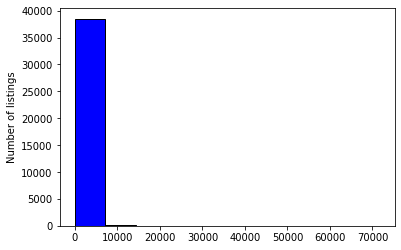

In [470]:
plt.hist(listings.price, color='blue', edgecolor='black')
plt.ylabel('Number of listings')

This distribution is right-skewed, not normal. Therefore a log transformation is recommended.

In [471]:
listings['log_price'] = np.log(listings.price)

In [472]:
listings = listings.replace([np.inf, -np.inf], np.nan)
listings.dropna(subset=['log_price'])
listings.shape

(38695, 108)

Text(0, 0.5, 'Number of listings')

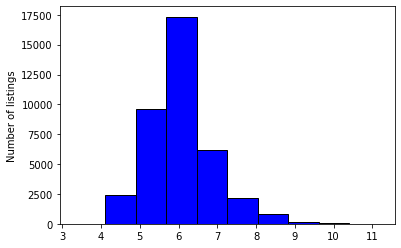

In [473]:
# Much better now with our log transformation!
plt.hist(listings.log_price, color='blue', edgecolor='black')
plt.ylabel('Number of listings')

Appropriate models are _classification_ models, as we have to predict if a certain AirBnb listing is expensive or not based on its price and the number of guests included. It is a **categorical** variable. This variable only takes two values: If the price per guest is greater than this metric's median, the listing is expensive and then the `expensive` variable gets a 1. Otherwise, a 0. 

Therefore, let's use the following Classification models: **Logistic Regression**, **KNeighborsClassifier** with 'k'=3, and another **Logistic Regression** model, but without the `log_price` variable. Because the `expensive` variable is created based on `price`, and `log_price` is the log-transformation form of this variable, it could cause our model to overfit.

In [474]:
m = smf.ols(formula='expensive ~ log_price', data=listings).fit()
m.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              expensive   R-squared:                       0.399
Model:                            OLS   Adj. R-squared:                  0.399
Method:                 Least Squares   F-statistic:                 2.569e+04
Date:                Mon, 16 Mar 2020   Prob (F-statistic):               0.00
Time:                        16:02:20   Log-Likelihood:                -18226.
No. Observations:               38686   AIC:                         3.646e+04
Df Residuals:                   38684   BIC:                         3.647e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.8161      0.015   -124.587      0.000      -1.845      -1.788
log_price      0.3819      0.002    160.291      0.000       0.377       0.387
==============================================================================
Omnibus:                     5681.008   Durbin-Watson:                   1.852
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1468.610
Skew:                          -0.147   Prob(JB):                         0.00
Kurtosis:                       2.092   Cond. No.                         46.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [475]:
# Transforming the `expensive` variable to a categorical one
listings.expensive = listings.expensive.astype('category')

In [476]:
listings.expensive.head(5)

0    0
1    1
2    1
3    1
4    1
Name: expensive, dtype: category
Categories (2, int64): [0, 1]

#### 2.5 - Model goodness indicators

For this case, I believe that the indicators that can be used to estimate the quality of our classification models are:
- Confusion Matrix: Describes the performance of a classification model
 - Accuracy: Percentage of correct answers
 - F-score: Harmonic mean of Precision and Recall

Let's do it! For the variables to be used, I decided on the following ones:
- log_price
- room_type (dummies)
- guests_included (modified and dummied)
- bedrooms (modified and dummied)
- bathrooms (modified and dummied)
- number_of_reviews

We know that the number of guests and the price have a direct impact on the `expensive` variable, as it is calculated based on these two variables. Besides, I think it will be interesting to see how a listing's reviews and the amount of shared and private rooms it has affects its prices and its expensiveness. 

Besides, I decided **not** to include certain variables such as `calculated_host_listings_count_private_rooms` and `calculated_host_listings_count_shared_rooms` as I believe that they posibly have an impact on the price of a listing but not its expensiveness. Also, these data is not available for the person trying to book an AirBnb at the listing's website, so I do not know how relevant they would be. Thus, by using the `bedrooms` variable only, we can try to **avoid multicollinearity**.

In [477]:
listings = listings.dropna(subset=['log_price', 'guests_included', 'number_of_reviews'])
listings.shape

(38686, 108)

#### 2.6 - Models!

##### Making some changes in the chosen variables

In [478]:
listings.guests_included.value_counts()

1     32230
2      3391
4      1519
3       497
6       399
5       258
8       125
7        65
10       61
16       57
12       37
9        18
14       12
15        9
13        4
11        4
Name: guests_included, dtype: int64

In [479]:
conditions = [
    (listings['guests_included'] == 1),
    (listings['guests_included'] == 2),
    (listings['guests_included'] == 3),
    (listings['guests_included'] == 4),
    (listings['guests_included'] == 5),
    (listings['guests_included'] == 6),
    (listings['guests_included'] > 6)]
choices = ['1', '2', '3', '4', '5', '6', '6+']
listings['guests_included_reduced'] = np.select(conditions, choices)

In [480]:
listings.bedrooms.value_counts()

1.0     25695
2.0      7640
3.0      2566
4.0       988
5.0       536
6.0       381
0.0       235
7.0       225
8.0       141
10.0      133
9.0        89
12.0       14
11.0       12
14.0        7
18.0        5
16.0        5
20.0        3
50.0        2
25.0        2
15.0        1
19.0        1
24.0        1
13.0        1
22.0        1
21.0        1
23.0        1
Name: bedrooms, dtype: int64

In [481]:
conditions = [
    (listings['bedrooms'] == 0.0) | (listings['bedrooms'] == 1.0),
    (listings['bedrooms'] == 2.0),
    (listings['bedrooms'] == 3.0),
    (listings['bedrooms'] == 4.0),
    (listings['bedrooms'] > 4.0)]
choices = ['1', '2', '3', '4','4+']
listings['bedrooms_reduced'] = np.select(conditions, choices)

In [482]:
# Bathrooms
listings.bathrooms.value_counts()

1.0      27363
1.5       4436
2.0       3532
3.0        852
0.5        500
4.0        482
2.5        288
5.0        235
6.0        181
0.0        172
8.0        168
7.0        102
4.5         83
3.5         74
5.5         33
9.0         28
7.5         27
6.5         21
10.0        19
12.0        14
8.5         11
10.5        11
11.0        10
9.5          7
14.0         4
15.0         4
12.5         4
16.0         3
13.0         3
16.5         3
22.0         2
20.0         2
14.5         2
18.5         2
25.0         2
18.0         2
33.0         1
20.5         1
101.5        1
19.5         1
Name: bathrooms, dtype: int64

In [483]:
conditions = [
    (listings['bathrooms'] == 0.0),
    (listings['bathrooms'] == 0.5) | (listings['bathrooms'] == 1.0),
    (listings['bathrooms'] == 1.5) | (listings['bathrooms'] == 2.0),
    (listings['bathrooms'] == 2.5) | (listings['bathrooms'] == 3.0),
    (listings['bathrooms'] == 3.5) | (listings['bathrooms'] == 4.0),
    (listings['bathrooms'] == 4.5) | (listings['bathrooms'] == 5.0),
    (listings['bathrooms'] > 5.0)]
choices = ['0', '1', '2', '3', '4', '5', '5+']
listings['bathrooms_reduced'] = np.select(conditions, choices)

Converting categorical variables to dummies (encoding them to numerical)

In [484]:
# LabelEncoder
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

listings['guest_red_dum'] = le.fit_transform(listings.guests_included_reduced)
listings['bed_red_dum'] = le.fit_transform(listings.bedrooms_reduced)
listings['bath_red_dum'] = le.fit_transform(listings.bathrooms_reduced)
listings['room_type_dum'] = le.fit_transform(listings.room_type)

#### Our data

In [485]:
y = listings.expensive
X = np.hstack((listings['log_price'].values.reshape((-1, 1)),
               listings['guest_red_dum'].values.reshape((-1, 1)),
               listings['bed_red_dum'].values.reshape((-1, 1)),
               listings['bath_red_dum'].values.reshape((-1, 1)),
               listings['room_type_dum'].values.reshape((-1, 1)),
               listings['number_of_reviews'].values.reshape((-1, 1)),
              ))

#### Logistic Regression

In [486]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# 20% of the data will be used for validation, and 80% for training
Xtrain, Xvalid, ytrain, yvalid = train_test_split(X, y, test_size=0.2)

In [487]:
# Confusion Matrix for training data
m = LogisticRegression(solver='lbfgs').fit(Xtrain, ytrain)
y_hat_train = m.predict(Xtrain)
conf_matrix = pd.crosstab(ytrain, y_hat_train)
conf_matrix

col_0,0,1
expensive,,
0,15290,236
1,113,15309


P.S: I am using the sklearn built-in equations to calculate accuracy and f1 scores because I was receiving this message when trying to do it my own: "The kernel appears to have died. It will restart automatically."

Otherwise I would have calculated them like this: 

Accuracy (percentage of correct answers = (TP + TN) / N )
`acc_valid = (conf_matrix_valid[0][0] + conf_matrix_valid[1][1]) / (conf_matrix_valid[0][0] + conf_matrix_valid[0][1] + conf_matrix_valid[1][0] + conf_matrix_valid[1][1])`

Precision (TP / (TP + FP)) = (TP / predicted positive)
`prec_valid = conf_matrix_valid[0][0] / (conf_matrix_valid[0][0] + conf_matrix_valid[0][1])`

Recall (percentage of real positives identified) = (TP / (TP + FN))
`rec_valid = conf_matrix_valid[0][0] / (conf_matrix_valid[0][0] + conf_matrix_valid[1][0])`

F score (harmonic mean of Precision and Recall) = 2 / (1/precision + 1/recall)
`f_score_valid = 2 / (1/prec_valid + 1/rec_valid)`

In [488]:
# Calculating Accuracy and F-score for training data
  # Accuracy (percentage of correct answers = (TP + TN) / N )
  # F1-score: Harmonic mean of Precision and Recall
from sklearn.metrics import accuracy_score, f1_score
print(f'Accuracy: {round(accuracy_score(ytrain, y_hat_train), 2)} ; F1: {round(f1_score(ytrain, y_hat_train), 2)}')

Accuracy: 0.99 ; F1: 0.99


In [489]:
from sklearn.metrics import mean_squared_error
# RMSE for training data
round(mean_squared_error(ytrain, y_hat_train), 2)

0.01

In [490]:
# Confusion Matrix for validation data
y_hat_valid = m.predict(Xvalid)
conf_matrix_valid = pd.crosstab(yvalid, y_hat_valid)
conf_matrix_valid

col_0,0,1
expensive,,
0,3793,63
1,25,3857


In [491]:
print(f'Accuracy: {round(accuracy_score(yvalid, y_hat_valid), 2)} ; F1: {round(f1_score(yvalid, y_hat_valid), 2)}')

Accuracy: 0.99 ; F1: 0.99


In [492]:
# RMSE for validation data
round(mean_squared_error(yvalid, y_hat_valid), 2)

0.01

#### k-NN Classification algorithm

Source for some of the code: https://towardsdatascience.com/building-a-k-nearest-neighbors-k-nn-model-with-scikit-learn-51209555453a

In [493]:
# 1 closest neighbor
k = 1

from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(Xtrain, ytrain)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [494]:
from sklearn.metrics import precision_recall_fscore_support
# Training data
result = knn.predict(Xtrain)

knn_f1 = precision_recall_fscore_support(ytrain, result, average='weighted')[2]

print(f'Accuracy: {round(knn.score(Xvalid, yvalid), 2)} ; F1: {round((knn_f1), 2)}')

Accuracy: 0.98 ; F1: 1.0


In [495]:
# RMSE for training data
round(mean_squared_error(ytrain, result), 2)

0.0

In [496]:
# Validation data
result = knn.predict(Xvalid)

knn_f1 = precision_recall_fscore_support(yvalid, result, average='weighted')[2]

print(f'Accuracy: {round(knn.score(Xvalid, yvalid), 2)} ; F1: {round((knn_f1), 2)}')

Accuracy: 0.98 ; F1: 0.98


In [497]:
# RMSE for validation data
round(mean_squared_error(yvalid, result), 2)

0.02

#### Trying different k-s

Got it from PS7! Shout out to my group members!

In [498]:
def computeAccuracy(X, y, k, m):
  Xtrain, Xval, ytrain, yval = train_test_split(X, y, test_size = .2)
  model = KNeighborsClassifier(k, metric = m)
  m_train = model.fit(Xtrain, ytrain)
  yhat_valid = m_train.predict(Xval)
  convert_yhat = yhat_valid == yval
  accuracy = convert_yhat.mean()
  return accuracy

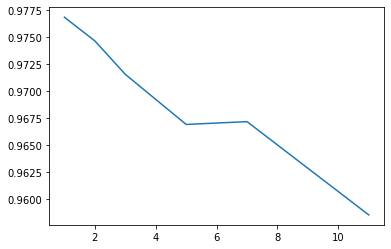

In [499]:
klist = [1,2,3,5,7,11]
accuracy = pd.Series(0, index = klist, dtype=float)
for k in klist:
  a = computeAccuracy(X, y, k, 'cosine')
  accuracy[k] = a

plt.plot(klist, accuracy)

We can see, from the plot above, that the accuracy for this k-NN model is very high, independent of the k-value we choose. The results for accuracy and the f1 scores are very similar to the one from the logistic regression model above.

#### Logistic Regression without `log_price`

In [500]:
y = listings.expensive
X = np.hstack((listings['guest_red_dum'].values.reshape((-1, 1)),
               listings['bed_red_dum'].values.reshape((-1, 1)),
               listings['bath_red_dum'].values.reshape((-1, 1)),
               listings['room_type_dum'].values.reshape((-1, 1)),
               listings['number_of_reviews'].values.reshape((-1, 1)),
              ))

In [501]:
# 20% of the data will be used for validation, and 80% for training
Xtrain, Xvalid, ytrain, yvalid = train_test_split(X, y, test_size=0.2)

In [502]:
# Confusion Matrix for training data
m = LogisticRegression(solver='lbfgs').fit(Xtrain, ytrain)
y_hat_train = m.predict(Xtrain)
conf_matrix = pd.crosstab(ytrain, y_hat_train)
conf_matrix

col_0,0,1
expensive,,
0,11574,3910
1,3083,12381


In [503]:
# Calculating Accuracy and F-score for training data
  # Accuracy (percentage of correct answers = (TP + TN) / N )
  # F1-score: Harmonic mean of Precision and Recall
from sklearn.metrics import accuracy_score, f1_score
print(f'Accuracy: {round(accuracy_score(ytrain, y_hat_train), 2)} ; F1: {round(f1_score(ytrain, y_hat_train), 2)}')

Accuracy: 0.77 ; F1: 0.78


In [504]:
# RMSE for training data
round(mean_squared_error(ytrain, y_hat_train), 2)

0.23

In [505]:
# Confusion Matrix for validation data
y_hat_valid = m.predict(Xvalid)
conf_matrix_valid = pd.crosstab(yvalid, y_hat_valid)
conf_matrix_valid

col_0,0,1
expensive,,
0,2896,1002
1,771,3069


In [506]:
print(f'Accuracy: {round(accuracy_score(yvalid, y_hat_valid), 2)} ; F1: {round(f1_score(yvalid, y_hat_valid), 2)}')

Accuracy: 0.77 ; F1: 0.78


In [507]:
# RMSE for validation data
round(mean_squared_error(yvalid, y_hat_valid), 2)

0.23

Once again, the scores for accuracy and f1 are basically the same for training and validation data. However, compared to the first Logistic Regression model, they are about 78% instead of 99%. As I stated before, the fact that the `expensive` variable is created based on `price`. As `log_price` is the log transformation of the original variable, it is also highly correlated to our dependent variable. As we remove `log_price` from the Classification Model, it is natural for our accuracy and f1 scores to decrease as well.

#### 2.7 - Best model

(a) Both models that had the `log_price` variable - the first Logistic Regression model, and the k-NN model - had almost perfect accuracy and f1 scores, both for training and validation data. The third model, even though it had a lower accuracy and f1 scores, also had very close percentages between training and validation data. In the end, I prefer the **k-NN model** as we can have a plot with the accuracy for different k-values chosen. This is great for **hyperparameter tuning**, which is a very important aspect of a classification model.

(b) The biggest difference was seen between the third model and the other two, for factors explained above a few times. There was a significant difference between them but, once again, the training and validation data had very similar results for accuracy and f1 scores, so that's positive.

(c) For all models, the RMSE scores for training and validation data are very similar to each other. If the RMSE for validation was much greater than the one for the training set, that would be an indicator of overfitting. However, as all models performed very well with validation data - in the same ratio as training data - I do not believe overfitting was an issue.

I spent about 7 to 8 hours total in this assignment!

### Statement of Compliance

![](https://i.imgur.com/ZtMCwZS.png)

Thank you for the great course! I hope to take INFO 371 in the future :)